## Day 4 (01/01/2026)

***Spikes firing rate changes with input current***

**Simulation Parameters**

In [117]:
import numpy as np
import matplotlib.pyplot as plt

#Time parameters
dt=0.1
T=100
time = np.arange(0,T,dt)

#Neuron parameters
V_rest = -65
V= np.zeros(len(time))
V[0]= V_rest

#Input currrent (constant)
I=5
tau =10

**Spikes**

In [118]:
V_th = -63
V_reset = -65
spikes = np.zeros(len(time))

**Refractory period**

In [119]:
refractory_period = 2
refractory_steps = int(refractory_period / dt)
refractory_timer =0

**Voltage update loop**

In [120]:
for t in range(1,len(time)):
    if refractory_timer>0:
        V[t] = V_reset
        refractory_timer-=1

    else:
        dV=(-(V[t-1] - V_rest) + I) * (dt/tau)
        V[t]=V[t-1] + dV
        
        if V[t] >= V_th:
            spikes[t]=1
            V[t] = V_reset
            refractory_timer = refractory_steps
    
  

**# Meaning**
- -(V[t-1] - V_rest) → leak pulling voltage back
- (+ I )→ constant input pushing voltage up
- (dt / tau) → scaling change per time step
- spikes[t] = 1 : is a boolean logic. (1 = High,0 = Low)
- V[t] = V_reset : resets back to base value

## Firing Rate Calculation
Firing rate represents the average number of spikes per second generated by the neuron.

In [121]:
total_spikes = np.sum(spikes)
total_time_sec= T/1000 #convert ms to seconds

firing_rate = total_spikes / total_time_sec
firing_rate

np.float64(140.0)

The high firing rate (~190 Hz) is due to strong constant input current and a low firing threshold.
This demonstrates that the firing rate is sensitive to model parameters such as input strength and threshold.


**# Meaning**
- np.sum(spikes) -> how many spikes happened
- T/1000 -> converts millisecond to seconds
- division -> spikes per second (Hz)

## Effect of Input Current on Firing Rate

- Lower input current results in fewer or no spikes
- Increasing input current increases firing frequency
- Firing rate is strongly dependent on input strength


**Plot**

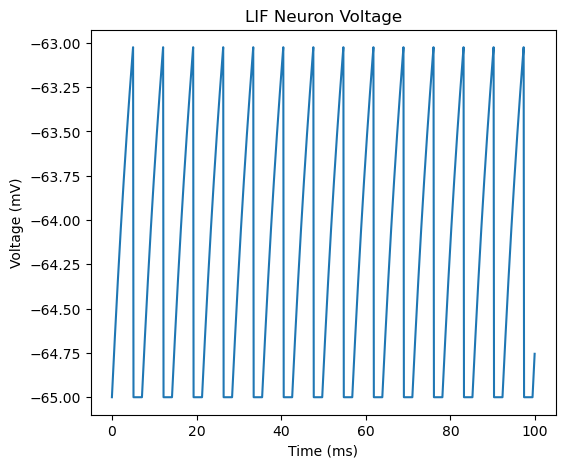

In [122]:
plt.figure(figsize=(6,5))
plt.plot(time,V)
plt.xlabel("Time (ms)")
plt.ylabel("Voltage (mV)")
plt.title("LIF Neuron Voltage")
plt.show()

## Spike Train Visualization
This plot shows the timing of spikes generated by the neuron.


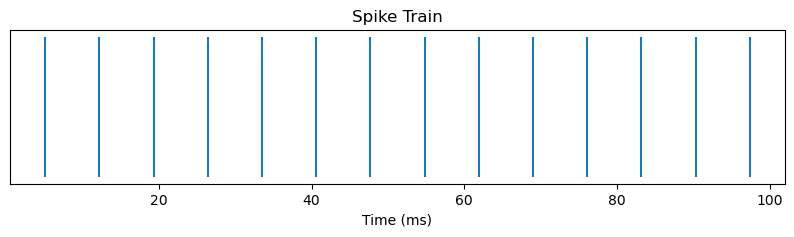

In [123]:
spike_times = time[spikes ==1]

plt.figure(figsize=(10,2))
plt.vlines(spike_times, ymin=0, ymax=1)
plt.xlabel("Time (ms)")
plt.yticks([])
plt.title("Spike Train")
plt.show()

## Input VS Rates

In [124]:
Input_current = np.array([2,5,8])
Firing_rates = np.array([0,140,200])

**Plot**

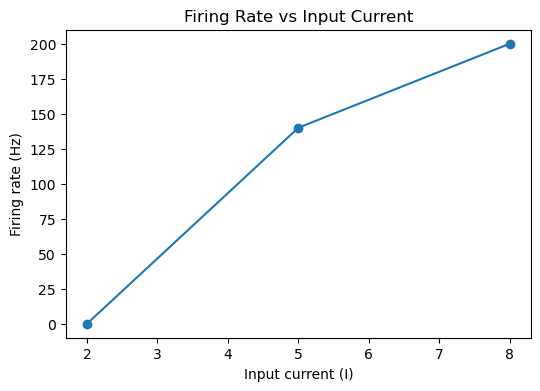

In [125]:
plt.figure(figsize=(6,4))
plt.plot(Input_current,Firing_rates,marker='o')
plt.xlabel("Input current (I)")
plt.ylabel("Firing rate (Hz)")
plt.title("Firing Rate vs Input Current")
plt.show()

## Overall Observations (Spike Generation, Firing Rate, and Refractory Period)

The leaky integrate-and-fire neuron model demonstrates clear spiking behavior when the membrane potential crosses a defined threshold.
Under constant input current, the neuron produces a regular spike train, and the firing rate increases with increasing input strength, illustrating rate coding behavior.

A minimum input current is required to initiate spiking; below this level, the membrane potential does not reach threshold and no spikes occur.
Once this critical input is exceeded, the neuron fires periodically, and stronger input results in shorter inter-spike intervals and higher firing rates.

Introducing an absolute refractory period significantly alters the firing behavior.
During the refractory period, the membrane potential is clamped to the reset value, preventing further integration of input current.
This enforces a minimum time between consecutive spikes and limits the maximum achievable firing rate, even under strong input current.

The inclusion of the refractory period makes the neuron model more biologically realistic by preventing unrealistically high firing frequencies.
Overall, the model captures essential neuronal dynamics, including threshold-based spiking, rate coding, and recovery behavior following spike events.
